# Figure3D

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)


In [3]:
import scanpy as sc

adata1 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047A2/D06047A2.meta.preprocessed.h5ad')
adata2 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047C3/D06047C3.meta.preprocessed.h5ad')
adata3 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047D4/D06047D4.meta.preprocessed.h5ad')
adata4 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047E1/D06047E1.meta.preprocessed.h5ad')
adata5 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047E2/D06047E2.meta.preprocessed.h5ad')
adata6 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047F6/D06047F6.meta.preprocessed.h5ad')
adata7 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050A2/D06050A2.meta.preprocessed.h5ad')
adata8 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050C2/D06050C2.meta.preprocessed.h5ad')
adata9 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050D4/D06050D4.meta.preprocessed.h5ad')
adata10 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06050E4/D06050E4.meta.preprocessed.h5ad')
adata11 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarnin

In [9]:
# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [10]:
adata.obs['TRAcdr3aa'].nunique(), adata.obs['TRBcdr3aa'].nunique(),adata.obs['IGHcdr3aa'].nunique(),adata.obs['IGK/Lcdr3aa'].nunique(),

(872, 1948, 16901, 5306)

In [4]:
# 1.统计数值
rows = []
for data, batch in zip(adata_list, batch_categories):
    all_cell = data.obs.shape[0]
    T_cell   = data.obs[(adata.obs['TRAcdr3aa'].notna()) | (data.obs['TRBcdr3aa'].notna())].shape[0]
    B_cell   = data.obs[(adata.obs['IGHcdr3aa'].notna()) | (data.obs['IGK/Lcdr3aa'].notna())].shape[0]
    
    rows.append({
        'batch'   : batch,
        'all_cell': all_cell,
        'T_cell'  : T_cell,
        'B_cell'  : B_cell
    })
df_counts = pd.DataFrame(rows)


In [7]:
df_counts['B_cell'].sum()

482702

In [4]:
# 1.统计数值
rows = []
for adata, batch in zip(adata_list, batch_categories):
    all_cell = adata.obs.shape[0]
    T_cell   = adata.obs[(adata.obs['TRAcdr3aa'].notna()) | (adata.obs['TRBcdr3aa'].notna())].shape[0]
    B_cell   = adata.obs[(adata.obs['IGHcdr3aa'].notna()) | (adata.obs['IGK/Lcdr3aa'].notna())].shape[0]
    
    rows.append({
        'batch'   : batch,
        'all_cell': all_cell,
        'T_cell'  : T_cell,
        'B_cell'  : B_cell
    })
df_counts = pd.DataFrame(rows)

# 2.将结果进行对数转换
df_counts[['all_cell', 'T_cell', 'B_cell']] = \
    df_counts[['all_cell', 'T_cell', 'B_cell']].apply(np.log10)

# 3.按样本编号排序
order = [
    'D06053D2', 'D06047C3', 'D06047F6', 'D06047E1', 'D06050A2',
    'D06047A2', 'D06050C2', 'D06047D4', 'D06047E2', 'D06050D4',
    'D06050E4'
]

# 将 batch 设为有序类别
df_counts['batch'] = pd.Categorical(df_counts['batch'], categories=order, ordered=True)

# 排序
df_counts = df_counts.sort_values('batch').reset_index(drop=True)
df_counts

,batch,all_cell,T_cell,B_cell
0,D06053D2,5.273277,4.413283,4.895539
1,D06047C3,4.990885,2.914343,4.102708
2,D06047F6,4.678099,3.435048,4.130527
3,D06047E1,4.746175,2.930440,3.826140
4,D06050A2,4.519263,2.463893,3.258637
5,D06047A2,5.115507,4.144823,5.020862
6,D06050C2,4.962180,2.926342,4.079217
7,D06047D4,5.142784,3.690196,4.824158
8,D06047E2,5.182931,4.215135,4.986180
9,D06050D4,4.969598,3.946059,4.827065


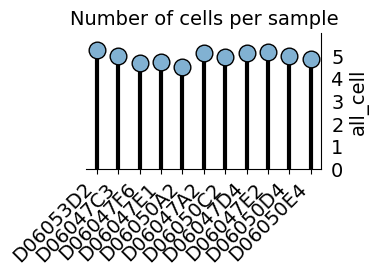

In [5]:
y_label  = y_col   = 'all_cell'

df_plot = df_counts.reset_index(drop=True)
x_pos   = range(df_plot.shape[0])

fig, ax = plt.subplots(figsize=(4, 3))

markerline, stemline, baseline = ax.stem(
    x_pos,
    df_plot[y_col],
    linefmt='k-',
    markerfmt='o',
    basefmt=' '
)

stemline.set_linewidth(3)
markerline.set_markersize(12)
markerline.set_markerfacecolor('#81B1D2')
markerline.set_markeredgewidth(1)

# 1. 把 y 轴移到右侧
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# 2. 把基线（y=0 的水平线）也移到右侧
baseline.set_xdata([ax.get_xlim()[1]] * 2)

ax.set_xticks(x_pos)
ax.set_xticklabels(df_plot['batch'], rotation=45, ha='right')
ax.set_ylabel(y_label)
ax.set_title('Number of cells per sample')
ax.set_ylim(0, 6)          # 控制显示范围
ax.set_yticks([0, 1, 2, 3, 4, 5])  # 控制刻度位置
sns.despine(ax=ax, left=True, right=False)
plt.tight_layout()
plt.grid(False)
plt.savefig('Figure3D_Totalcell.pdf')
plt.show()

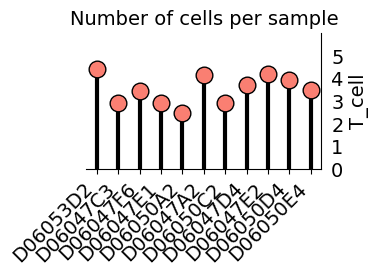

In [6]:
y_col   = y_label = 'T_cell'

df_plot = df_counts.reset_index(drop=True)
x_pos   = range(df_plot.shape[0])

fig, ax = plt.subplots(figsize=(4, 3))

markerline, stemline, baseline = ax.stem(
    x_pos,
    df_plot[y_col],
    linefmt='k-',
    markerfmt='o',
    basefmt=' '
)

stemline.set_linewidth(3)
markerline.set_markersize(12)
markerline.set_markerfacecolor('#FA7F72')
markerline.set_markeredgewidth(1)

# 1. 把 y 轴移到右侧
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# 2. 把基线（y=0 的水平线）也移到右侧
baseline.set_xdata([ax.get_xlim()[1]] * 2)

ax.set_xticks(x_pos)
ax.set_xticklabels(df_plot['batch'], rotation=45, ha='right')
ax.set_ylabel(y_label)
ax.set_title('Number of cells per sample')
ax.set_ylim(0, 5)  
sns.despine(ax=ax, left=True, right=False)
plt.tight_layout()
plt.grid(False)
ax.set_ylim(0, 6)          # 控制显示范围
ax.set_yticks([0, 1, 2, 3, 4, 5])  # 控制刻度位置
plt.savefig('Figure3D_Tcell.pdf')
plt.show()

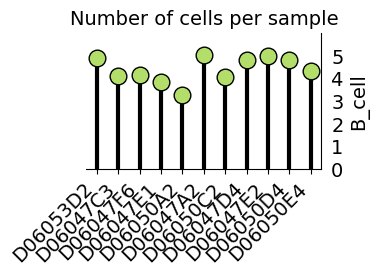

In [7]:
y_col   = y_label = 'B_cell'

df_plot = df_counts.reset_index(drop=True)
x_pos   = range(df_plot.shape[0])

fig, ax = plt.subplots(figsize=(4, 3))

markerline, stemline, baseline = ax.stem(
    x_pos,
    df_plot[y_col],
    linefmt='k-',
    markerfmt='o',
    basefmt=' '
)

stemline.set_linewidth(3)
markerline.set_markersize(12)
markerline.set_markerfacecolor('#B3DE69')
markerline.set_markeredgewidth(1)

# 1. 把 y 轴移到右侧
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# 2. 把基线（y=0 的水平线）也移到右侧
baseline.set_xdata([ax.get_xlim()[1]] * 2)

ax.set_xticks(x_pos)
ax.set_xticklabels(df_plot['batch'], rotation=45, ha='right')
ax.set_ylabel(y_label)
ax.set_title('Number of cells per sample')
ax.set_ylim(0, 6)          # 控制显示范围
ax.set_yticks([0, 1, 2, 3, 4, 5])  # 控制刻度位置
sns.despine(ax=ax, left=True, right=False)
plt.tight_layout()
plt.grid(False)
plt.savefig('Figure3D_Bcell.pdf')
plt.show()

# Figure3E

In [8]:
import pandas as pd

rows = []
for adata, batch in zip(adata_list, batch_categories):
    rows.append({
        'batch': batch,
        'TRA'  : adata.obs['TRAcdr3aa'].dropna().nunique(),
        'TRB'  : adata.obs['TRBcdr3aa'].dropna().nunique(),
        'IGH'  : adata.obs['IGHcdr3aa'].dropna().nunique(),
        'IGKL' : adata.obs['IGK/Lcdr3aa'].dropna().nunique()
    })

df_cdr3 = pd.DataFrame(rows)

# 按既定顺序排序（如果前面已排好，可省略）
order = [
    'D06053D2', 'D06047C3', 'D06047F6', 'D06047E1', 'D06050A2',
    'D06047A2', 'D06050C2', 'D06047D4', 'D06047E2', 'D06050D4',
    'D06050E4'
]
df_cdr3['batch'] = pd.Categorical(df_cdr3['batch'], categories=order, ordered=True)
df_cdr3 = df_cdr3.sort_values('batch')

# 保存
df_cdr3.to_csv('Figure3E.csv', index=False)

In [9]:
df_cdr3

,batch,TRA,TRB,IGH,IGKL
10,D06053D2,571,1289,3919,1423
1,D06047C3,24,50,978,353
5,D06047F6,68,90,1012,414
3,D06047E1,22,46,517,205
6,D06050A2,9,21,290,166
0,D06047A2,157,340,3714,1441
7,D06050C2,15,31,692,165
2,D06047D4,41,60,4899,1020
4,D06047E2,108,195,3395,1183
8,D06050D4,80,189,5306,1697


# Figure3F

In [22]:
adata=sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/bin50/P5_D06053D2_bin50_scanpy_out.h5ad')
tissue_outline=pd.DataFrame(adata.uns['tissue_outline'],columns=['x','y'])
adata.uns['bin50 structural annotation_colors']=['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', 'white', '#b3de69']
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata1.obsm['X_umap'] = adata1.obsm['spatial']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


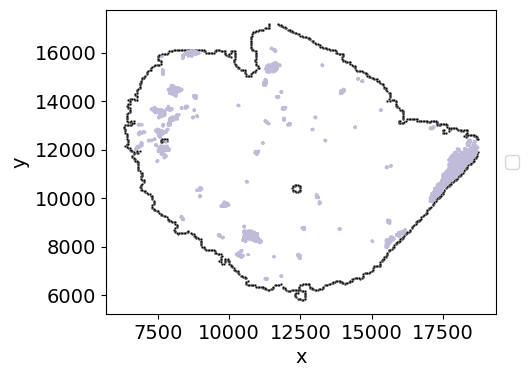

In [23]:
df=adata.obs
plt.figure(figsize=(5, 4))
#plt.style.use('dark_background')
#sns.scatterplot(data=df,x='x',y='y', cmap='lightgrey', s=0.1,legend=None)
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3)
sns.scatterplot(data=df[df['bin50 structural annotation']=='LA-TLS'],x='x',y='y',color='#bfbbd9',edgecolor='none',s=4)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=4)
plt.grid(False)
plt.savefig('Figure3F.pdf',dpi=600, bbox_inches='tight')

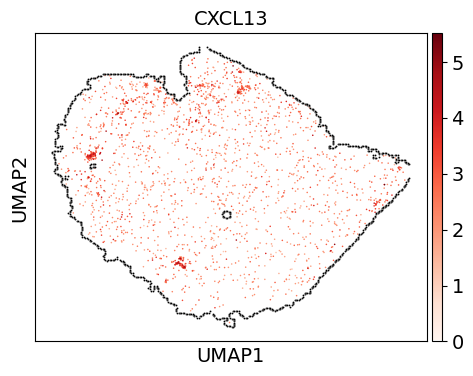

In [28]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load tissue outline data
tissue_outline1 = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])

# Create a modified colormap where 0 values are white
reds = plt.cm.Reds(np.linspace(0, 1, 256))
# Set the first color (for 0 values) to white
reds[0] = [1, 1, 1, 1]  # RGBA for white
custom_reds = LinearSegmentedColormap.from_list('custom_reds', reds)

# Create figure with tight layout
fig,ax = plt.subplots(figsize=(5, 4))

# Plot UMAP with custom colormap
sc.pl.umap(adata, color=['CXCL13'], cmap=custom_reds, s = 5, ax = ax , show=False)

# Get current axes and overlay tissue outline
ax = plt.gca()
sns.scatterplot(data=tissue_outline1, x='x', y='y', color='black', s=2, ax=ax, legend=None)

# Adjust layout and save
plt.tight_layout()
plt.savefig('CXCL13_zoomin.png', dpi=2500, bbox_inches='tight')
plt.show()

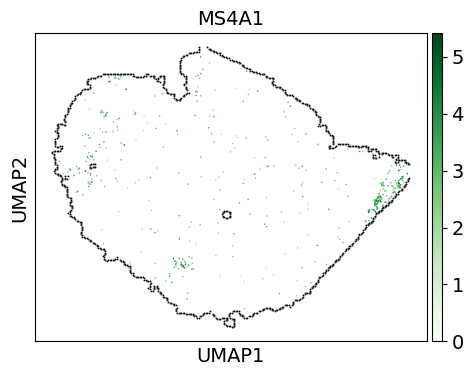

In [34]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load tissue outline data
tissue_outline1 = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])

# Create a modified colormap where 0 values are white
greens = plt.cm.Greens(np.linspace(0, 1, 256))
# Set the first color (for 0 values) to white
greens[0] = [1, 1, 1, 1]  # RGBA for white
custom_greens = LinearSegmentedColormap.from_list('custom_greens', greens)

# Create figure with tight layout
fig,ax = plt.subplots(figsize=(5, 4))

# Plot UMAP with custom colormap
sc.pl.umap(adata, color=['MS4A1'], cmap=custom_greens, s=5, ax = ax ,show=False)

# Get current axes and overlay tissue outline
ax = plt.gca()
sns.scatterplot(data=tissue_outline1, x='x', y='y', color='black', s=2, ax=ax, legend=None)

# Adjust layout and save
plt.tight_layout()
plt.savefig('MS4A1_zoomin.png', dpi=2500, bbox_inches='tight')
plt.show()

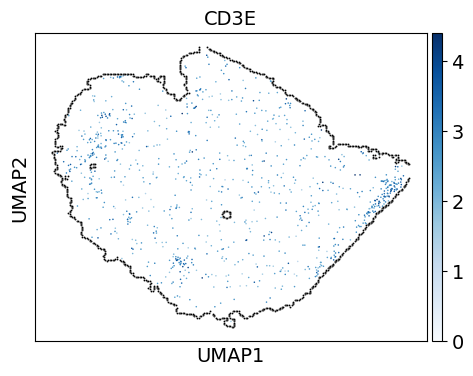

In [36]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load tissue outline data
tissue_outline1 = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])

# Create modified Blues colormap (0 = white)
blues = plt.cm.Blues(np.linspace(0, 1, 256))
blues[0] = [1, 1, 1, 1]  # Set lowest value to white (RGBA)
custom_blues = LinearSegmentedColormap.from_list('custom_blues', blues)

# Create figure
fig,ax = plt.subplots(figsize=(5, 4))

# Plot UMAP with custom colormap
sc.pl.umap(adata, color=['CD3E'], cmap=custom_blues, s=5, ax = ax , show=False)

# Overlay tissue outline
ax = plt.gca()
sns.scatterplot(data=tissue_outline1, x='x', y='y', color='black', s=2, ax=ax, legend=None)

# Save high-res image
plt.tight_layout()
plt.savefig('CD3E_zoomin.pdf', dpi=2500, bbox_inches='tight')
plt.show()

# Figure3G

In [15]:
adata=sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

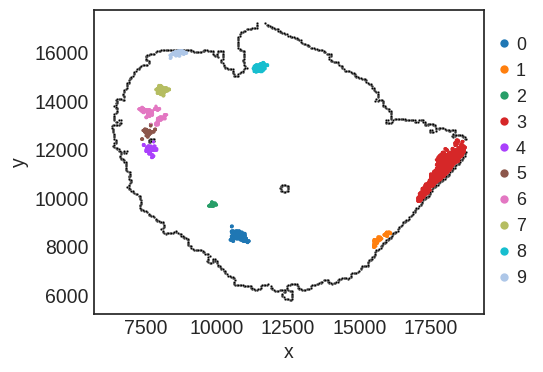

In [16]:
df=adata.obs
tissue_outline1 = pd.DataFrame(adata.uns['tissue_outline'], columns=['x', 'y'])
plt.figure(figsize=(5, 4))
plt.style.use('seaborn-v0_8-white')
#sns.scatterplot(data=df,x='x',y='y', cmap='lightgrey', s=0.1,legend=None)
sns.scatterplot(data=tissue_outline1,x='x',y='y',color='black',s=3)
sns.scatterplot(data=df[df['TLScluster'].notna()],x='x',y='y',hue='TLScluster',
                palette=['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b','#e377c2', '#b5bd61', '#17becf', '#aec7e8'],edgecolor='none',s=4)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=3)
plt.grid(False)
plt.savefig('Figure3G.pdf',dpi=600, bbox_inches='tight')

# Figure3H

In [17]:
adata11.obs['TLScluster'] = adata.obs['TLScluster'] 

In [18]:
df = adata11.obs[adata11.obs['TLScluster'].notna()]
result = df.groupby('TLScluster')['IGHcdr3aa'].nunique()
df1 = df[df['IGHcdr3aa'].notna()]

In [19]:
T0 = df1[df1['TLScluster'] == 0]['IGHcdr3aa'].unique().tolist()
T3 = df1[df1['TLScluster'] == 3]['IGHcdr3aa'].unique().tolist()
T6 = df1[df1['TLScluster'] == 6]['IGHcdr3aa'].unique().tolist()
T7 = df1[df1['TLScluster'] == 7]['IGHcdr3aa'].unique().tolist()
T8 = df1[df1['TLScluster'] == 8]['IGHcdr3aa'].unique().tolist()

In [20]:
len(T0),len(T3),len(T6),len(T7),len(T8)

(102, 333, 100, 65, 92)

In [21]:
intersection_count = len(set(T6) & set(T0))
print("交集个数：", intersection_count)

交集个数： 18


# Figure 3I

In [22]:
data1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
data3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
data4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
data5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
data9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
data11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [55]:
adata1 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047A2/D06047A2.meta.preprocessed.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [56]:
data1.obs[data1.obs['TLScluster'].notna()]

,dnbCount,area,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,...,CSR,class,TRDcdr3aa,TRGcdr3aa,IGHcdr3aa,mutation_percent,clone_family_id,shm,depth,label
4592,439,782,sample,15325,5561,4592,15300,5550,NaN,NaN,...,no,,NaN,NaN,ARYLESPSTGWIDPW,0.161538,2364.0,yes,1.0,2|A
4597,280,500,sample,15308,5570,4597,15300,5550,NaN,NaN,...,no,,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN
6529,271,476,sample,15092,5848,6529,15050,5800,NaN,NaN,...,yes,"IGHG, IGHA",NaN,NaN,CAKPSLRWEDYLDHW,0.100000,1868.0,no,NaN,NaN
6530,351,664,sample,15092,5782,6530,15050,5750,NaN,NaN,...,no,,NaN,NaN,ARYLESPSTGWIDPW,0.161538,2364.0,no,1.0,2|A
6531,110,198,sample,15090,5880,6531,15050,5850,NaN,NaN,...,yes,"IGHG, IGHA",NaN,NaN,CARANCVGDCLFRWFDPW,0.115385,306.0,no,1.0,2|A.D.G.M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127597,118,220,sample,11019,14367,127597,11000,14350,NaN,NaN,...,no,,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN
127599,192,372,sample,11018,14396,127599,11000,14350,NaN,CASSPGQGVGYTF,...,no,,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN
127600,385,769,sample,11014,14348,127600,11000,14300,NaN,NaN,...,yes,"IGHG, IGHA, IGHM",NaN,NaN,NaN,NaN,NaN,no,NaN,NaN
128507,195,347,sample,14184,14345,128507,14150,14300,NaN,NaN,...,no,,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN


In [57]:
adata1.obs['TLScluster'] = data1.obs['TLScluster'].astype(str)
adata3.obs['TLScluster'] = data3.obs['TLScluster']
adata4.obs['TLScluster'] = data4.obs['TLScluster']
adata5.obs['TLScluster'] = data5.obs['TLScluster']
adata9.obs['TLScluster'] = data9.obs['TLScluster']
adata11.obs['TLScluster'] = data11.obs['TLScluster']

In [58]:
adata1.obs[adata1.obs['TLScluster'].notna()]

,dnbCount,area,id,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,mutation_percent,CSR,classes,IGK/Lcdr3aa,IGKorIGL,IGHcdr3aa,bin50_location_id,TLScluster
4592,439,782,4592,sample,15325,5561,4592,15300,5550,NaN,NaN,0.161538,NaN,NaN,NaN,NaN,CARYLESPSTGWIDPW,DNB_15300_5550,0
4597,280,500,4597,sample,15308,5570,4597,15300,5550,NaN,CASSLVASGGTYEQYF,0.107692,NaN,NaN,NaN,NaN,CTSDLNFLTDDYGYFYHGMDVW,DNB_15300_5550,0
6529,271,476,6529,sample,15092,5848,6529,15050,5800,NaN,NaN,0.269231,NaN,NaN,CQSADSSDTSHVVF,IGL,CAKPSLRWEDYLDHW,DNB_15050_5800,0
6530,351,664,6530,sample,15092,5782,6530,15050,5750,NaN,NaN,0.053846,NaN,NaN,NaN,NaN,CAKEAPVLRFLEWGNEPYFIAW,DNB_15050_5750,0
6531,110,198,6531,sample,15090,5880,6531,15050,5850,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,CARANCVGDCLFRWFDPW,DNB_15050_5850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127597,118,220,127597,sample,11019,14367,127597,11000,14350,NaN,NaN,0.323077,NaN,NaN,NaN,NaN,CARDYDGLHVW,DNB_11000_14350,5
127599,192,372,127599,sample,11018,14396,127599,11000,14350,NaN,CASSPAQGVGYTF,0.161538,NaN,NaN,NaN,NaN,CARYLESPSTGWIDPW,DNB_11000_14350,5
127600,385,769,127600,sample,11014,14348,127600,11000,14300,NaN,NaN,0.138462,NaN,NaN,NaN,NaN,CGKSGQFFEVGATFNAMDVW,DNB_11000_14300,5
128507,195,347,128507,sample,14184,14345,128507,14150,14300,NaN,NaN,0.138462,NaN,NaN,NaN,NaN,CAGAVVRGLKYYYDYW,DNB_14150_14300,4


In [59]:
# 确保变量名唯一
adata_list = [adata1,adata3, adata4, adata5, adata9, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047D4", "D06047E1", "D06047E2", "D06050D4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [60]:
adata.obs['batch'].nunique()

6

In [61]:
import pandas as pd

tmp = pd.DataFrame(columns=['ClusterCount', 'ISOcdr3aaCount', 'id'])

for i in adata.obs.batch.unique():
    m = adata[adata.obs['batch'] == i]
    data = m.obs
    cluster_col = 'cluster'
    isotype_col = 'IGHcdr3aa'

    # 1) 计算该样本一共有多少个 TLScluster
    actual_clusters = data['TLScluster'].dropna().unique()
    n_tls = len(actual_clusters)

    # 2) 构造需要统计的 DataFrame
    df = data[['TLScluster', isotype_col]].copy()
    df[cluster_col] = 'x'
    df.loc[df['TLScluster'].notna(), cluster_col] = df['TLScluster']
    df = df[df[cluster_col] != 'x']     # 去掉未分配到 TLS 的行
    df = df[df[isotype_col].notna()]    # 去掉空 CDR3

    # 3) 如果过滤后没有行，直接构造全 0 表
    if df.empty:
        count_summary = pd.DataFrame({
            'ClusterCount': range(1, n_tls + 1),
            'ISOcdr3aaCount': 0
        })
    else:
        cluster_counts = (
            df.groupby(isotype_col)[cluster_col]
              .nunique()
              .reset_index(name='ClusterCount')
        )

        count_summary = (
            cluster_counts['ClusterCount']
            .value_counts()
            .sort_index()
            .reset_index()
            .rename(columns={'index': 'ClusterCount', 'ClusterCount': 'ISOcdr3aaCount'})
        )

        # 补全缺失值
        full_range = pd.RangeIndex(1, n_tls + 1, name='ClusterCount')
        count_summary = (
            count_summary
            .set_index('ClusterCount')
            .reindex(full_range, fill_value=0)
            .reset_index()
        )

    # 4) 添加样本 id
    count_summary['id'] = i

    # 5) 拼到总表
    tmp = pd.concat([tmp, count_summary], axis=0, ignore_index=True)

tmp = tmp.astype({'ClusterCount': int, 'ISOcdr3aaCount': int})

<Figure size 100x150 with 0 Axes>

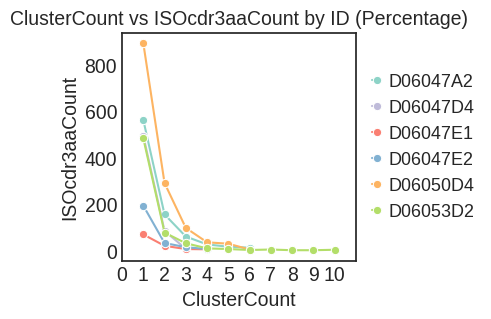

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 3))
plt.style.use('seaborn-v0_8-white')

colos=['D06047A2','D06047D4','D06047E1','D06047E2','D06050D4','D06053D2']
df=tmp[tmp['id'].isin(colos)]
# 获取所有唯一的 id
ids = df['id'].unique()

# 创建图形和轴
plt.figure(figsize=(3, 3))
# 循环绘制每个 id 的折线图
sns.lineplot(data=df, x='ClusterCount', y='ISOcdr3aaCount', palette=['#8DD3C7','#BFBBD9','#FA7F72','#81B1D2','#FDB462','#B3DE69'],
             hue='id', marker='o')
#for id,colo in zip(ids,colos):
#    subset = df[df['id'] == id]
#    ax.plot(subset['ClusterCount'], subset['ISOcdr3aaCount'], marker='o', color=colo,label=f'id={id}')

# 添加标题和标签
plt.title('ClusterCount vs ISOcdr3aaCount by ID (Percentage)')
#plt.set_xlabel('ClusterCount')
#plt.set_ylabel('ISOcdr3aaCount')

# 显示图例
plt.legend(title='ID')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=1)
plt.grid(False)
plt.xlim(0 , 11)
plt.xticks(range(0, 11))
# 显示图表
plt.savefig('./fig3i_upper_left_IGH.pdf',dpi=600, bbox_inches='tight')

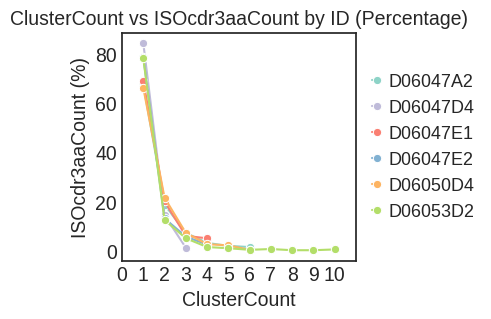

In [63]:
plt.figure(figsize=(3, 3))
group_sums = df.groupby('id')['ISOcdr3aaCount'].transform('sum')

# 计算每个 id 的 ISOcdr3aaCount 占该 id 总和的百分比
df['ISOcdr3aaCount_pct'] = (df['ISOcdr3aaCount'] / group_sums) * 100

# 使用 seaborn 绘制折线图
sns.lineplot(data=df, x='ClusterCount', y='ISOcdr3aaCount_pct', palette=['#8DD3C7','#BFBBD9','#FA7F72','#81B1D2','#FDB462','#B3DE69'],
             hue='id', marker='o')

# 添加标题和标签
plt.title('ClusterCount vs ISOcdr3aaCount by ID (Percentage)')
plt.xlabel('ClusterCount')
plt.ylabel('ISOcdr3aaCount (%)')

# 显示图例
plt.legend(title='ID')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=1)
plt.xlim(0, 11)
plt.xticks(range(0, 11))
# 显示图表
plt.savefig('./fig3i_lower_left_IGH.pdf',dpi=600, bbox_inches='tight')

In [64]:
import pandas as pd

tmp = pd.DataFrame(columns=['ClusterCount', 'ISOcdr3aaCount', 'id'])

for i in adata.obs.batch.unique():
    m = adata[adata.obs['batch'] == i]
    data = m.obs
    cluster_col = 'cluster'
    isotype_col = 'TRBcdr3aa'

    # 1) 计算该样本一共有多少个 TLScluster
    actual_clusters = data['TLScluster'].dropna().unique()
    n_tls = len(actual_clusters)

    # 2) 构造需要统计的 DataFrame
    df = data[['TLScluster', isotype_col]].copy()
    df[cluster_col] = 'x'
    df.loc[df['TLScluster'].notna(), cluster_col] = df['TLScluster']
    df = df[df[cluster_col] != 'x']     # 去掉未分配到 TLS 的行
    df = df[df[isotype_col].notna()]    # 去掉空 CDR3

    # 3) 如果过滤后没有行，直接构造全 0 表
    if df.empty:
        count_summary = pd.DataFrame({
            'ClusterCount': range(1, n_tls + 1),
            'ISOcdr3aaCount': 0
        })
    else:
        cluster_counts = (
            df.groupby(isotype_col)[cluster_col]
              .nunique()
              .reset_index(name='ClusterCount')
        )

        count_summary = (
            cluster_counts['ClusterCount']
            .value_counts()
            .sort_index()
            .reset_index()
            .rename(columns={'index': 'ClusterCount', 'ClusterCount': 'ISOcdr3aaCount'})
        )

        # 补全缺失值
        full_range = pd.RangeIndex(1, n_tls + 1, name='ClusterCount')
        count_summary = (
            count_summary
            .set_index('ClusterCount')
            .reindex(full_range, fill_value=0)
            .reset_index()
        )

    # 4) 添加样本 id
    count_summary['id'] = i

    # 5) 拼到总表
    tmp = pd.concat([tmp, count_summary], axis=0, ignore_index=True)

tmp = tmp.astype({'ClusterCount': int, 'ISOcdr3aaCount': int})

<Figure size 100x150 with 0 Axes>

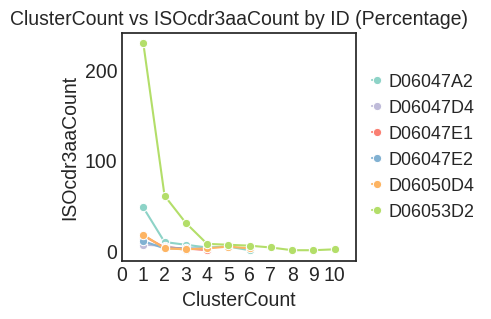

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 3))
plt.style.use('seaborn-v0_8-white')

colos=['D06047A2','D06047D4','D06047E1','D06047E2','D06050D4','D06053D2']
df=tmp[tmp['id'].isin(colos)]
# 获取所有唯一的 id
ids = df['id'].unique()

# 创建图形和轴
plt.figure(figsize=(3, 3))
# 循环绘制每个 id 的折线图
sns.lineplot(data=df, x='ClusterCount', y='ISOcdr3aaCount', palette=['#8DD3C7','#BFBBD9','#FA7F72','#81B1D2','#FDB462','#B3DE69'],
             hue='id', marker='o')
#for id,colo in zip(ids,colos):
#    subset = df[df['id'] == id]
#    ax.plot(subset['ClusterCount'], subset['ISOcdr3aaCount'], marker='o', color=colo,label=f'id={id}')

# 添加标题和标签
plt.title('ClusterCount vs ISOcdr3aaCount by ID (Percentage)')
#plt.set_xlabel('ClusterCount')
#plt.set_ylabel('ISOcdr3aaCount')

# 显示图例
plt.legend(title='ID')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=1)
plt.grid(False)
plt.xlim(0 , 11)
plt.xticks(range(0, 11))
# 显示图表
plt.savefig('./fig3i_upper_right_TRB.pdf',dpi=600, bbox_inches='tight')

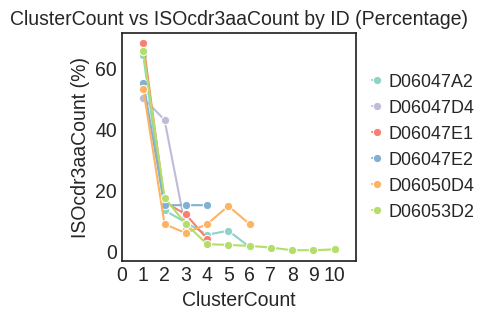

In [66]:
plt.figure(figsize=(3, 3))
group_sums = df.groupby('id')['ISOcdr3aaCount'].transform('sum')

# 计算每个 id 的 ISOcdr3aaCount 占该 id 总和的百分比
df['ISOcdr3aaCount_pct'] = (df['ISOcdr3aaCount'] / group_sums) * 100

# 使用 seaborn 绘制折线图
sns.lineplot(data=df, x='ClusterCount', y='ISOcdr3aaCount_pct', palette=['#8DD3C7','#BFBBD9','#FA7F72','#81B1D2','#FDB462','#B3DE69'],
             hue='id', marker='o')

# 添加标题和标签
plt.title('ClusterCount vs ISOcdr3aaCount by ID (Percentage)')
plt.xlabel('ClusterCount')
plt.ylabel('ISOcdr3aaCount (%)')

# 显示图例
plt.legend(title='ID')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=1)
plt.xlim(0, 11)
plt.xticks(range(0, 11))
# 显示图表
plt.savefig('./fig3i_lower_right_TRB.pdf',dpi=600, bbox_inches='tight')

# Figure3J

In [68]:
data1

AnnData object with n_obs × n_vars = 130469 × 33160
    obs: 'dnbCount', 'area', 'orig.ident', 'x', 'y', 'cellID', 'bin50_x', 'bin50_y', 'TRAcdr3aa', 'TRBcdr3aa', 'IGK/Lcdr3aa', 'IGKorIGL', 'bin50_location_id', 'anno', 'anno2', 'bin50 structural annotation', 'loc', 'PCAcluster', 'TLScluster', 'CSR', 'class', 'TRDcdr3aa', 'TRGcdr3aa', 'IGHcdr3aa', 'mutation_percent', 'clone_family_id', 'shm', 'depth', 'label'
    var: 'real_gene_name'
    uns: 'PCAcluster_colors', 'TLScluster_colors', 'anno2_colors', 'bin50 structural annotation_colors', 'bin_size', 'bin_type', 'key_record', 'merged', 'resolution', 'sn', 'tissue_outline'
    obsm: 'X_umap', 'cell_border', 'spatial'

In [69]:
adata1.obs['bin50_anno'] = data1.obs['bin50 structural annotation']
adata3.obs['bin50_anno'] = data3.obs['bin50 structural annotation']
adata4.obs['bin50_anno'] = data4.obs['bin50 structural annotation']
adata5.obs['bin50_anno'] = data5.obs['bin50 structural annotation']
adata9.obs['bin50_anno'] = data9.obs['bin50 structural annotation']
adata11.obs['bin50_anno'] = data11.obs['bin50 structural annotation']

In [70]:
for i in [adata1,adata3,adata4,adata5,adata9,adata11]:
    df=i.obs
    inter=len(set(df[df['bin50_anno']=='LA-TLS']['IGHcdr3aa'].unique()).intersection(set(df[df['bin50_anno']!='LA-TLS']['IGHcdr3aa'].unique())))
    TLS=len(set(df[df['bin50_anno']=='LA-TLS']['IGHcdr3aa'].unique()))
    print(inter/TLS)

0.9211391018619934
0.9466666666666667
0.7941176470588235
0.975
0.9258720930232558
0.8164116828929068


In [72]:
# 需要提前把 6 个 adata 对象放进列表里
adatas = [adata1, adata3, adata4, adata5, adata9, adata11]

# 用 set 自动去重
tls_cdr3   = set()
non_cdr3   = set()

for adata in adatas:
    obs = adata.obs
    
    # TLS 区域
    tls_idx = obs['bin50_anno'] == 'LA-TLS'
    tls_cdr3.update(obs.loc[tls_idx, 'IGHcdr3aa'].dropna().unique())
    
    # 非 TLS 区域
    non_idx = obs['bin50_anno'] != 'LA-TLS'
    non_cdr3.update(obs.loc[non_idx, 'IGHcdr3aa'].dropna().unique())

# 交集
intersection = tls_cdr3 & non_cdr3

# 结果
print('TLS unique IGHcdr3aa 数量：', len(tls_cdr3))
print('非-TLS unique IGHcdr3aa 数量：', len(non_cdr3))
print('交集元素个数：', len(intersection))

# 如需查看具体序列：
# tls_list   = sorted(tls_cdr3)
# non_list   = sorted(non_cdr3)
# inter_list = sorted(intersection)

TLS unique IGHcdr3aa 数量： 3330
非-TLS unique IGHcdr3aa 数量： 15012
交集元素个数： 3054


In [74]:
3054 / 3330

0.9171171171171171

In [71]:
for i in [adata1,adata3,adata4,adata5,adata9,adata11]:
    df=i.obs
    inter=len(set(df[df['bin50_anno']=='LA-TLS']['TRBcdr3aa'].unique()).intersection(set(df[df['bin50_anno']!='LA-TLS']['TRBcdr3aa'].unique())))
    TLS=len(set(df[df['bin50_anno']=='LA-TLS']['TRBcdr3aa'].unique()))
    print(inter/TLS)

0.9390243902439024
1.0
0.7307692307692307
0.9047619047619048
0.8055555555555556
0.9465648854961832


In [73]:
# 需要提前把 6 个 adata 对象放进列表里
adatas = [adata1, adata3, adata4, adata5, adata9, adata11]

# 用 set 自动去重
tls_cdr3   = set()
non_cdr3   = set()

for adata in adatas:
    obs = adata.obs
    
    # TLS 区域
    tls_idx = obs['bin50_anno'] == 'LA-TLS'
    tls_cdr3.update(obs.loc[tls_idx, 'TRBcdr3aa'].dropna().unique())
    
    # 非 TLS 区域
    non_idx = obs['bin50_anno'] != 'LA-TLS'
    non_cdr3.update(obs.loc[non_idx, 'TRBcdr3aa'].dropna().unique())

# 交集
intersection = tls_cdr3 & non_cdr3

# 结果
print('TLS unique TRBcdr3aa 数量：', len(tls_cdr3))
print('非-TLS unique TRBcdr3aa 数量：', len(non_cdr3))
print('交集元素个数：', len(intersection))

# 如需查看具体序列：
# tls_list   = sorted(tls_cdr3)
# non_list   = sorted(non_cdr3)
# inter_list = sorted(intersection)

TLS unique TRBcdr3aa 数量： 505
非-TLS unique TRBcdr3aa 数量： 1823
交集元素个数： 475


In [75]:
475 / 505

0.9405940594059405

# Figure 3K

In [76]:
adata9=sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')
adata3=sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/tmp/ipykernel_2154188/2298631372.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['anno']=tmp['anno'].astype(str)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


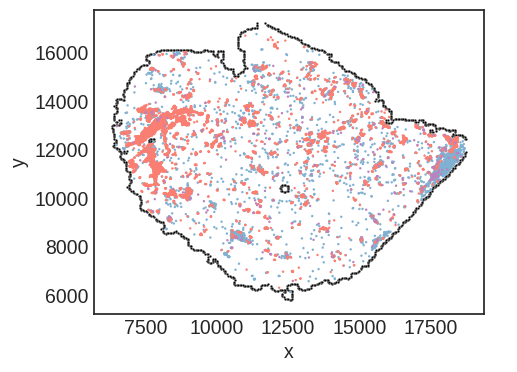

In [77]:
df=adata9.obs
tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
plt.figure(figsize=(5, 4))
#plt.style.use('dark_background')
#sns.scatterplot(data=df,x='x',y='y', cmap='lightgrey', s=0.1,legend=None)
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3)
tmp=df[df['anno'].isin(['plasma_cell','Tcell','b_cell'])]
tmp['anno']=tmp['anno'].astype(str)
sns.scatterplot(data=tmp[tmp['anno']=='Tcell'],x='x',y='y',color='#81B1D2',edgecolor='none',s=3)
sns.scatterplot(data=tmp[tmp['anno']=='plasma_cell'],x='x',y='y',color='#FA7F72',edgecolor='none',s=3)
sns.scatterplot(data=tmp[tmp['anno']=='b_cell'],x='x',y='y',color='#BC82BD',edgecolor='none',s=3)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=10)
plt.grid(False)
plt.savefig('./fig3K_left.png',dpi=600, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


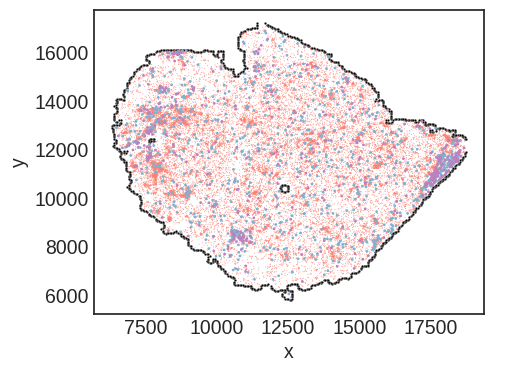

In [78]:
df=adata9[:,['JCHAIN','CD3E','MS4A1']].to_df()
df=adata9.obs.merge(df,left_index=True,right_index=True)

tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
plt.figure(figsize=(5, 4))
#plt.style.use('dark_background')
#sns.scatterplot(data=df,x='x',y='y', cmap='lightgrey', s=0.1,legend=None)
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3)
#tmp=df[df['anno'].isin(['plasma_cell','Tcell','b_cell'])]
#tmp['anno']=tmp['anno'].astype(str)
sns.scatterplot(data=df[df['JCHAIN']!=0],x='x',y='y',color='#FA7F72',edgecolor='none',s=0.4)
sns.scatterplot(data=df[df['CD3E']!=0],x='x',y='y',color='#81B1D2',edgecolor='none',s=4)
sns.scatterplot(data=df[df['MS4A1']!=0],x='x',y='y',color='#BC82BD',edgecolor='none',s=4)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=10)
plt.grid(False)
plt.savefig('./fig3K_right.png',dpi=600, bbox_inches='tight')

0


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


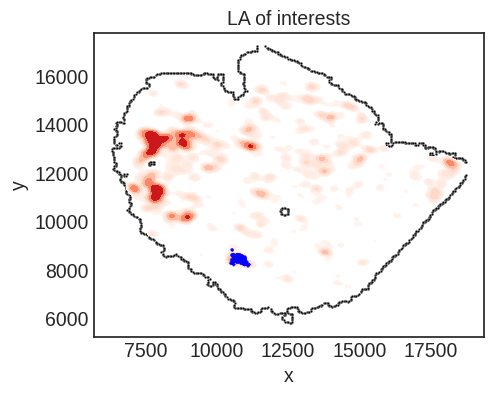

1


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


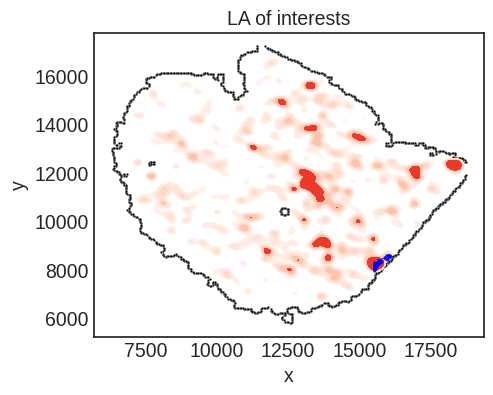

2


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


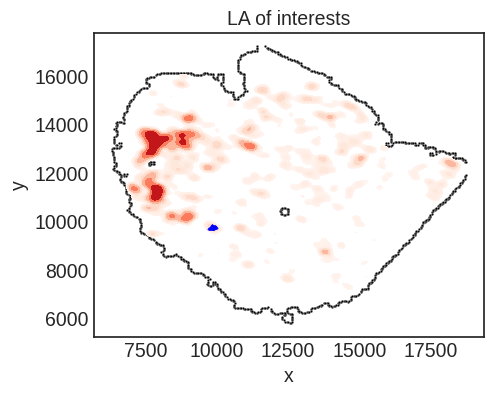

3


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


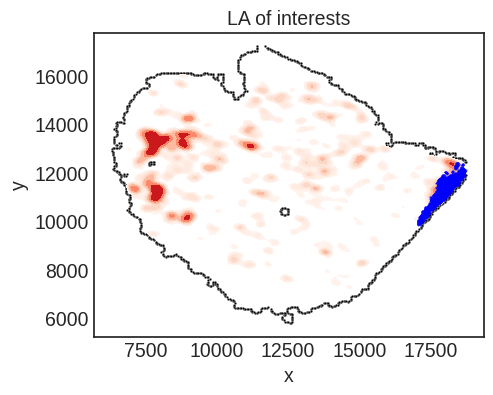

4


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


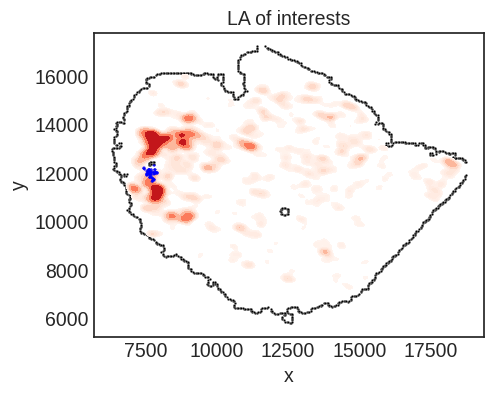

5


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


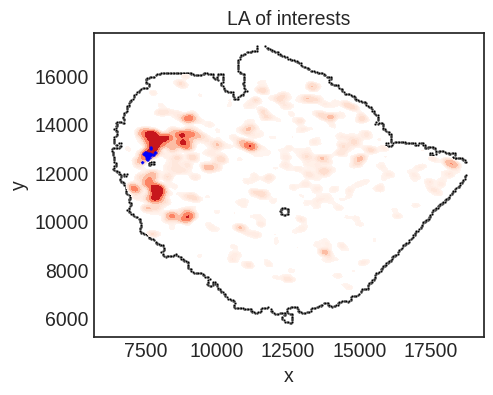

6


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


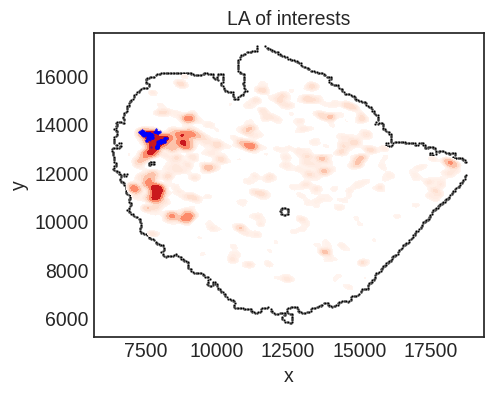

7


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


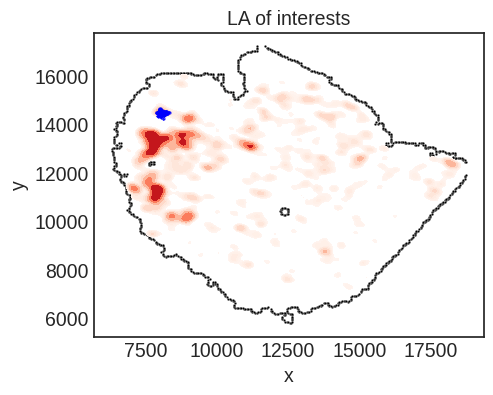

8


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


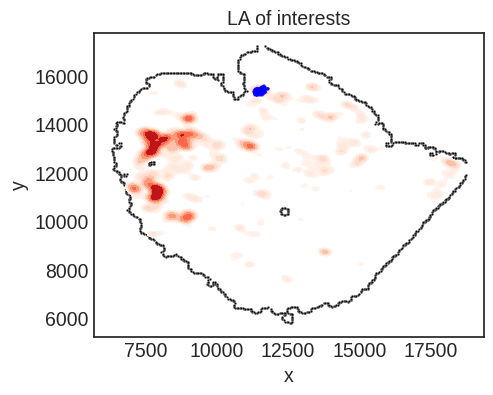

9


/tmp/ipykernel_2154188/3744014657.py:26: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


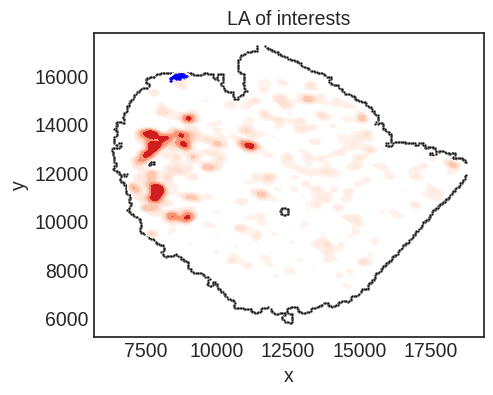

In [79]:
for i in adata9.obs['TLScluster'].cat.categories.to_list():
    LA='LA-TLS'
    clus='TLScluster'
    iso='IGHcdr3aa'
    clusNo=i
    tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
    print(i)
    df=adata9.obs
    df=df[df['bin50 structural annotation']==LA]
    crosstab = pd.crosstab(df[clus], df[iso])
    shared_sequences = crosstab.columns[crosstab.sum(axis=0) > 1]
    shared_stats = crosstab.sum(axis=0)
    num_shared_sequences = len(shared_sequences)
    shared_details = shared_stats[shared_sequences]
    shared_stats.value_counts()
    
    TLS_XCR=[x for x in df[df[clus]==clusNo][iso].unique().to_list() if not pd.isna(x)]
    df2=adata9.obs
    
    plt.figure(figsize=(5, 4))
#    plt.scatter(df2['x'], df2['y'], color='lightgrey',s=0.2)
    sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3)
#    plt.scatter(df2[df2[iso].isin(TLS_XCR)]['x'], df2[df2[iso].isin(TLS_XCR)]['y'], color='red',s=0.1)
    plt.grid(False)
    plt.title('LA of interests')
    sns.kdeplot(data=df2[df2[iso].isin(TLS_XCR)], x='x', y='y', fill=True, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)
    plt.scatter(df2[df2[clus].isin([clusNo])]['x'], df2[df2[clus].isin([clusNo])]['y'], color='blue',s=0.1)
    plt.savefig('./fig3h_D06053D2_IGH_TLS_'+i.astype(str)+'.png',dpi=600, bbox_inches='tight')
    plt.show()